# Python para Análise de Dados - Pandas  02

<p> Iremos trabalhar com base de imóveis que obtive no site Kaggle. 

Você pode fazer Download diretamente no nosso **GitHub**, [aqui](https://github.com/minerandodados/mdrepo/blob/master/kc_house_data.csv)



In [1]:
# Importe a biblioteca pandas
import pandas as pd

In [2]:
# Lendo a base de dados
arquivo = 'kc_house_data.csv'
dataset = pd.read_csv(arquivo, sep=',')

<Axes: >

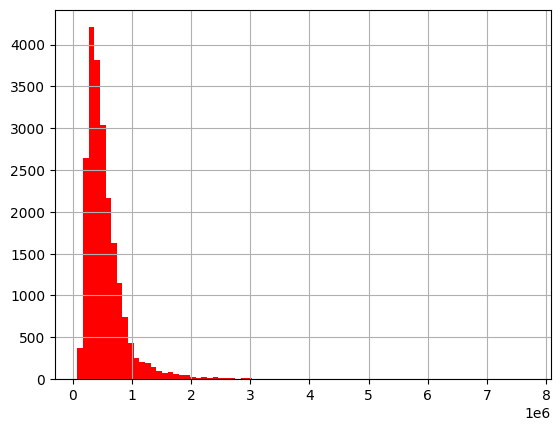

In [6]:
# Plota um Histograma com a coluna Price com 30 bins (agrupamento de dados em 30 barras) na cor vermelho
%matplotlib inline
dataset['price'].hist(bins=80, color='red')

array([[<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>]], dtype=object)

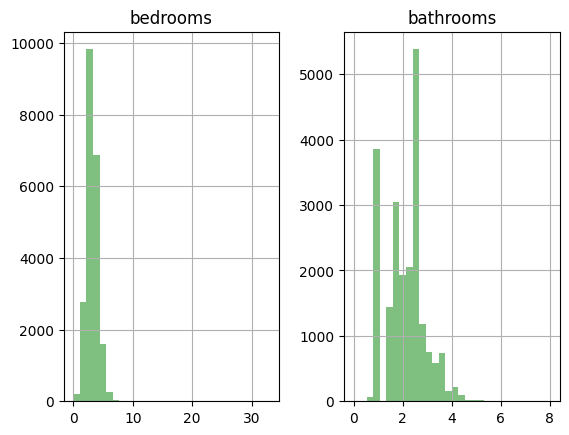

In [7]:
# Plota histogramas das colunas bedrooms e bathrooms lado a lado na cor verde.
%matplotlib inline
dataset[['bedrooms','bathrooms']].hist(bins=30,alpha=0.5,color='Green')

**Estatistica Descritiva**

In [8]:
# Imprime o valor médio da coluna bedrooms
dataset['bedrooms'].mean()

3.3709102688694523

In [9]:
# Imprime o valor máximo da coluna bedrooms
dataset['bedrooms'].max()

33.0

In [10]:
# Imprime o valor mínimo da coluna bedrooms
dataset['bedrooms'].min()

0.0

In [11]:
# Imprime o desvio padrão da coluna bedrooms
dataset['bedrooms'].std()

0.9300844679400369

In [12]:
# Imprime o valor máximo da coluna bedrooms 
# Assimetria (valores acima de 0 diz que tem mais valores acima da média)
dataset['bedrooms'].skew()

1.9744391609000942

In [17]:
# Esse método retorna o valor de simetria de cada coluna do dataset.
# Um valor zero indica uma distribuição simétrica
# Um valor maior que zero ou menor indica uma distribuição assimétrica.
# Valores acima de zero podemos dizer que existe uma assimetria positiva 
# Valores abaixo de zero uma assimetria negativa.
# Isso quer dizer que valores muito acima de zero indicam que existem mais valores acima da média
# valores abaixo de zero significa que contém mais valores abaixo da média.
# dataset.columns
dataset[['bedrooms', 'bathrooms', 'price', 'floors']].skew()

bedrooms     1.974439
bathrooms    0.511108
price        4.024069
floors       0.616107
dtype: float64

# **Extraindo Insights**

* Vamos agora trabalhar com um tipo de gráfico muito interessante.

* Os gráficos do tipo Boxplot são excelentes ferramentas de análise de dados, principalmente para identificar _**outliers**_.

In [18]:
import matplotlib

<Axes: >

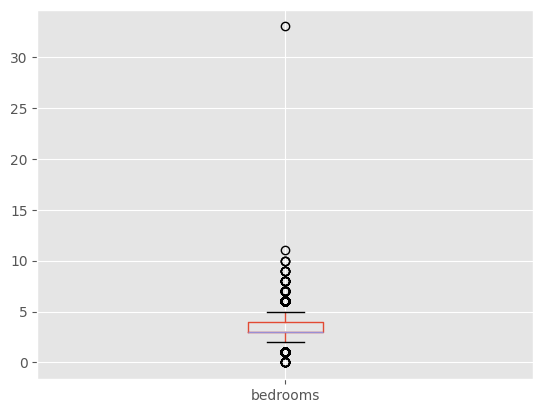

In [19]:
# Plota gráfico do tipo Boxplot da coluna bedrooms
# Esse gráfico é muito rico e é possível visualizar Outliers
%matplotlib inline
matplotlib.style.use('ggplot')

dataset.boxplot(column='bedrooms')

In [20]:
# Visualizando os estilos de layout disponível
matplotlib.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

<Axes: title={'center': 'price'}, xlabel='bedrooms'>

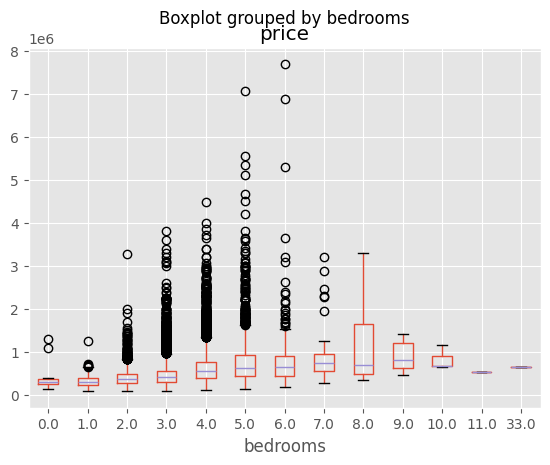

In [21]:
# Plota boxplot da coluna 'price' por número de quartos
%matplotlib inline
dataset.boxplot(column='price', by='bedrooms')

**Correlação **

In [24]:
dataset.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [30]:
# Imprime a correlação de todas as colunas do dataframe (person)
dataset[['bedrooms', 'price', 'bathrooms', 'floors', 'sqft_lot15', 'sqft_living15', 'view']].corr()

,bedrooms,price,bathrooms,floors,sqft_lot15,sqft_living15,view
bedrooms,1.000000,0.308321,0.515929,0.175440,0.029221,0.391670,0.079515
price,0.308321,1.000000,0.525138,0.256791,0.082447,0.585379,0.397293
bathrooms,0.515929,0.525138,1.000000,0.500626,0.087175,0.568634,0.187737
floors,0.175440,0.256791,0.500626,1.000000,-0.011280,0.279856,0.029432
sqft_lot15,0.029221,0.082447,0.087175,-0.011280,1.000000,0.183192,0.072575
sqft_living15,0.391670,0.585379,0.568634,0.279856,0.183192,1.000000,0.280439
view,0.079515,0.397293,0.187737,0.029432,0.072575,0.280439,1.000000


In [29]:
dataset[['bedrooms', 'price', 'bathrooms', 'floors', 'sqft_lot15', 'sqft_living15', 'view']].corr('spearman')

,bedrooms,price,bathrooms,floors,sqft_lot15,sqft_living15,view
bedrooms,1.000000,0.344615,0.521451,0.227565,0.201530,0.443878,0.081405
price,0.344615,1.000000,0.497160,0.322359,0.062766,0.572290,0.293931
bathrooms,0.521451,0.497160,1.000000,0.546776,0.063111,0.570304,0.155549
floors,0.227565,0.322359,0.546776,1.000000,-0.231411,0.305398,0.019641
sqft_lot15,0.201530,0.062766,0.063111,-0.231411,1.000000,0.365723,0.116520
sqft_living15,0.443878,0.572290,0.570304,0.305398,0.365723,1.000000,0.255793
view,0.081405,0.293931,0.155549,0.019641,0.116520,0.255793,1.000000


In [ ]:
# Imprime a correlação de spearman (esta leva em consideração a correção positiva e negativa)
dataset.corr('spearman')

In [31]:
# Imprime a correção de algumas colunas
dataset[['bedrooms','bathrooms','sqft_living','floors','waterfront','grade','price']].corr()

,bedrooms,bathrooms,sqft_living,floors,waterfront,grade,price
bedrooms,1.000000,0.515929,0.576679,0.175440,-0.006589,0.356972,0.308321
bathrooms,0.515929,1.000000,0.754665,0.500626,0.063744,0.664983,0.525138
sqft_living,0.576679,0.754665,1.000000,0.353922,0.103818,0.762704,0.702035
floors,0.175440,0.500626,0.353922,1.000000,0.023695,0.458171,0.256791
waterfront,-0.006589,0.063744,0.103818,0.023695,1.000000,0.082775,0.266369
grade,0.356972,0.664983,0.762704,0.458171,0.082775,1.000000,0.667434
price,0.308321,0.525138,0.702035,0.256791,0.266369,0.667434,1.000000


<Axes: >

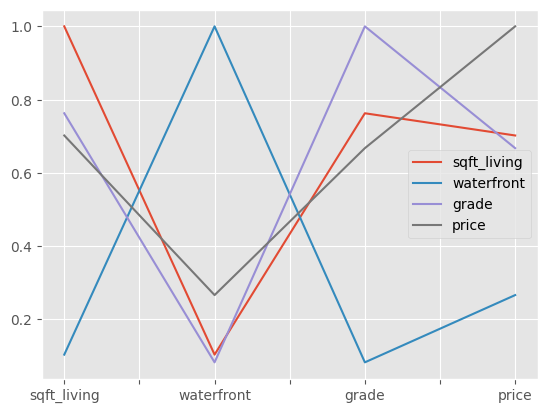

In [32]:
# Plotando a correlação de algumas colunas
%matplotlib inline
dataset[['sqft_living','waterfront','grade','price']].corr().plot()

# **Tabelas Pivot**

In [33]:
# Tabelas Pivot são úteis para fazer agrupamento nos dados.
# Conta a quantidade de imóveis agrupados pelas colunas waterfront e floors.
# O parametro index informo as colunas que serão usadas para agregação.
# o parâmetro aggfunc é usado para definir a função de agregação, que poderia ser uma média por exemplo.
# O parâmetro margins=True calcula a quantidade total no final da tabela.

# Muito interessante a performance dessa operação.
dataset.pivot_table('id',index=["waterfront","floors"], aggfunc='count',margins=True)

id
waterfront floors       
0          1.0     10622
           1.5      1889
           2.0      8166
           2.5       159
           3.0       605
           3.5         8
1          1.0        57
           1.5        21
           2.0        75
           2.5         2
           3.0         8
All                21612

**Crosstab**

In [34]:
# Crosstab ou tabulação Cruzada
# Essa funcionalidade cruza valores das variáveis
# Nesse exemplo podemos ver qual a distribuição dos imóvies por número de quartos com relação a sua condição
# Podemos ver que imoveis com 3 quartos estão mais na condição 5

pd.crosstab(dataset['bedrooms'],dataset['condition'])

condition,1,2,3,4,5
bedrooms,,,,,
0.0,1,1,10,1,0
1.0,4,11,124,48,12
2.0,12,51,1779,717,200
3.0,8,69,6306,2711,728
4.0,4,36,4579,1682,580
5.0,0,1,1031,418,151
6.0,1,3,158,87,23
7.0,0,0,25,9,4
8.0,0,0,8,3,2


<Axes: title={'center': 'Condition by Bedrooms'}, xlabel='bedrooms'>

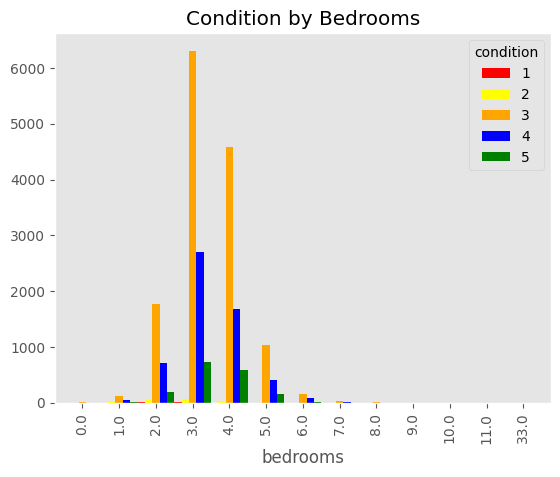

In [35]:
# Plota a tabulação Cruzada
# Usamos o método plot com um gráfico de barras

table = pd.crosstab(dataset['bedrooms'],dataset['condition'])
table.plot(kind='bar',width=1.0, color=['red','yellow','orange','blue','green'], title='Condition by Bedrooms' ,grid=False)

# ** Trabalhando com Excel **

* Com o Pandas podemos trabalhar com o Excel.

* Isso é muito bom, pois, sabemos que temos muita informação nos dias de hoje em planilhas do excel.

* Diante disso você pode usar o pandas para manipular planilhas do excel e até mesmo gerar novas planilhas a partir de outros dados.

In [38]:
# Lendo uma planilha do excel no Pandas.
dataframe_excel = pd.read_excel(
    'Controle-de-Atividades-2.0.xlsx', 
    #sheetname=0,
    header=1
)

In [39]:
dataframe_excel.head()

,N°,Atividade,Responsável,Estado Atual,Início,Previsão,Término,Duração Prev.,Duração Real,SITUAÇÃO,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,Elaborar relatório de vendas,Antonio,ENCERRADA,2015-03-01 12:20:00,2015-03-01 18:30:00,2015-03-05 07:30:00,06:10:00,1900-01-03 19:10:00,ATRASADA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,Encerrar Balanço,Antonio,INICIADA,2015-03-01 07:00:00,2015-03-08 09:00:00,2015-03-08 09:00:00,1900-01-07 02:00:00,1900-01-07 02:00:00,EM DIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,Preparar novo Plano de Contas,Pedro,ADIADA,2015-03-01 00:00:00,2015-03-20 00:00:00,NaT,1900-01-19 00:00:00,NaT,ADIANTADA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INICIADA
4,4.0,Preparar reunião de resultados,Márcia,ENCERRADA,2015-03-02 00:00:00,2015-03-10 00:00:00,NaT,1900-01-08 00:00:00,NaT,ADIANTADA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADIADA


In [41]:
# Lendo o arquivo indexando pela coluna 'Estado Atual'

file = 'Controle-de-Atividades-2.0.xlsx'
dataframe_excel = pd.read_excel(
    file, 
    #sheetname=0, 
    header=1, 
    index_col=3
)

In [42]:
dataframe_excel.head(10)

,N°,Atividade,Responsável,Início,Previsão,Término,Duração Prev.,Duração Real,SITUAÇÃO,Unnamed: 10,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
Estado Atual,,,,,,,,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENCERRADA,1.0,Elaborar relatório de vendas,Antonio,2015-03-01 12:20:00,2015-03-01 18:30:00,2015-03-05 07:30:00,06:10:00,1900-01-03 19:10:00,ATRASADA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INICIADA,2.0,Encerrar Balanço,Antonio,2015-03-01 07:00:00,2015-03-08 09:00:00,2015-03-08 09:00:00,1900-01-07 02:00:00,1900-01-07 02:00:00,EM DIA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADIADA,3.0,Preparar novo Plano de Contas,Pedro,2015-03-01 00:00:00,2015-03-20 00:00:00,NaT,1900-01-19 00:00:00,NaT,ADIANTADA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INICIADA
ENCERRADA,4.0,Preparar reunião de resultados,Márcia,2015-03-02 00:00:00,2015-03-10 00:00:00,NaT,1900-01-08 00:00:00,NaT,ADIANTADA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADIADA
NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaT,,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUSPENSA
NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaT,,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENCERRADA
NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaT,,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaT,,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADIANTADA


In [43]:
# Ordenando o dataframe pela coluna de índice. 
dataframe_excel.sort_index()

,N°,Atividade,Responsável,Início,Previsão,Término,Duração Prev.,Duração Real,SITUAÇÃO,Unnamed: 10,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
Estado Atual,,,,,,,,,,,,,,,,,,,,,
ADIADA,3.0,Preparar novo Plano de Contas,Pedro,2015-03-01 00:00:00,2015-03-20 00:00:00,NaT,1900-01-19 00:00:00,NaT,ADIANTADA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INICIADA
ENCERRADA,1.0,Elaborar relatório de vendas,Antonio,2015-03-01 12:20:00,2015-03-01 18:30:00,2015-03-05 07:30:00,06:10:00,1900-01-03 19:10:00,ATRASADA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENCERRADA,4.0,Preparar reunião de resultados,Márcia,2015-03-02 00:00:00,2015-03-10 00:00:00,NaT,1900-01-08 00:00:00,NaT,ADIANTADA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADIADA
INICIADA,2.0,Encerrar Balanço,Antonio,2015-03-01 07:00:00,2015-03-08 09:00:00,2015-03-08 09:00:00,1900-01-07 02:00:00,1900-01-07 02:00:00,EM DIA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaT,,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUSPENSA
NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaT,,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENCERRADA
NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaT,,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaT,,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADIANTADA


# ** Gerando Planilhas a partir de Dataframes **


In [44]:
# Vou usar o dataset de imoveis para gerar uma planilha.
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [45]:
# Gerando uma planilha com algumas colunas
colunas = ['id','price','bedrooms','bathrooms','sqft_living','floors','waterfront']
dataset[colunas].head()

,id,price,bedrooms,bathrooms,sqft_living,floors,waterfront
0,7129300520,221900.0,3.0,1.00,1180,1.0,0
1,6414100192,538000.0,3.0,2.25,2570,2.0,0
2,5631500400,180000.0,2.0,1.00,770,1.0,0
3,2487200875,604000.0,4.0,3.00,1960,1.0,0
4,1954400510,510000.0,3.0,2.00,1680,1.0,0


In [47]:
# Escrevendo no disco a planilha sem o valor do índice.
dataset[colunas].to_excel('planilha_pandas.xlsx',index=False)